<a href="https://colab.research.google.com/github/PacTal/Physics/blob/main/Teller_Jugando_con_datos%2C_el_caso_de_la_f%C3%ADsica_de_Galileo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jugando con datos, el caso de la físca de Galileo

*Prof. Paco H. Talero L.*
*FICB-Universidad Central*

Este trabajo propone una formulación histórica para enseñar el movimiento en planos inclinados en física, basada en la egla de los números impares de Galileo. En lugar de emplear conceptos newtonianos como velocidad y aceleración, esta formulación relaciona directamente **distancia y tiempo**. Esta aproximación pedagógica facilita la **comprensión conceptual** y ofrece  reflexiones **epistemológicas** en la enseñanza de la física.



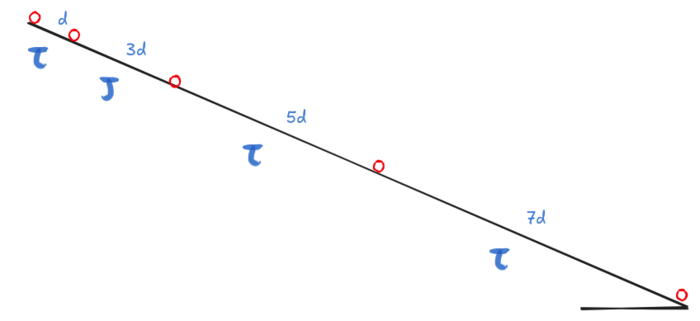

# Instalamos la biblioteca OpenCV
OpenCV es una herramienta fundamental en visión por computadora y análisis de imágenes, ampliamente utilizada en investigación, desarrollo de aplicaciones y producción en industrias tecnológicas, automotrices, biomédicas, y muchas más.

In [ ]:
!pip install opencv-python  # Comando para instalar la biblioteca OpenCV en Python, usada para procesamiento de imágenes y visión por computadora


# Bibliotecas necesarias

In [ ]:
import numpy as np  # Biblioteca para operaciones numéricas y manipulación eficiente de arreglos y matrices
import matplotlib.pyplot as plt  # Biblioteca de visualización de gráficos 2D, ideal para exploración de datos
import cv2  # Biblioteca de procesamiento de imágenes y visión por computadora
from google.colab.patches import cv2_imshow  # Función específica para mostrar imágenes en Google Colab usando OpenCV
import IPython.display as display  # Biblioteca para mostrar y manipular medios en celdas de Jupyter o Colab
import time  # Biblioteca para trabajar con fechas, horas y medición de tiempo


# Interactuando con Google Drive

In [ ]:
from google.colab import drive  # Importa el módulo de Google Colab para interactuar con Google Drive
drive.mount('/content/drive')  # Monta Google Drive en el entorno Colab, permitiendo acceso a archivos almacenados en Drive


Mounted at /content/drive


# Vídeo de movimiento físico

El vídeo que contiene la grabación de la esfera bajando se encuentra aquí: [Galileo](https://youtube.com/shorts/n7RF6zJYNAc). Descarguelo usando [ssyoutube.com](https://ssyoutube.com/en787IC/) Y luego debe subirse a la carpeta temporal de Google Drive.

En Google Colab, la carpeta temporal es /content y se vacía al finalizar la sesión.

# Manipulando el archivo de video

In [ ]:
video_path = '/content/galileocl_HFO7B5mY.mp4' # Ruta al archivo de video en la carpeta temporal de Colab
cap = cv2.VideoCapture(video_path) # Carga el video

In [ ]:
# Verifica si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el video.")
else:
    print("Video cargado correctamente.")


Video cargado correctamente.


In [ ]:
# Carga el video y obtiene el número total de fotogramas
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

print("Número total de fotogramas:", total_frames)



Número total de fotogramas: 601


In [ ]:
""" Descripción de la función
    Obtiene un fotograma específico de un video.
    Parámetros:
    - video_path: str, la ruta del archivo de video.
    - frame_number: int, el número del fotograma a extraer.
    Retorna:
    - frame: el fotograma especificado como una imagen (array de NumPy).
    """
def obtener_fotograma(video_path, frame_number):
    cap = cv2.VideoCapture(video_path)     # Carga el video
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number) # Configura la posición en el fotograma deseado
    ret, frame = cap.read()  # Lee el fotograma
    cap.release() # Libera el objeto de captura de video
    return frame

# Obteniendo fotogramas del vídeo uno a uno

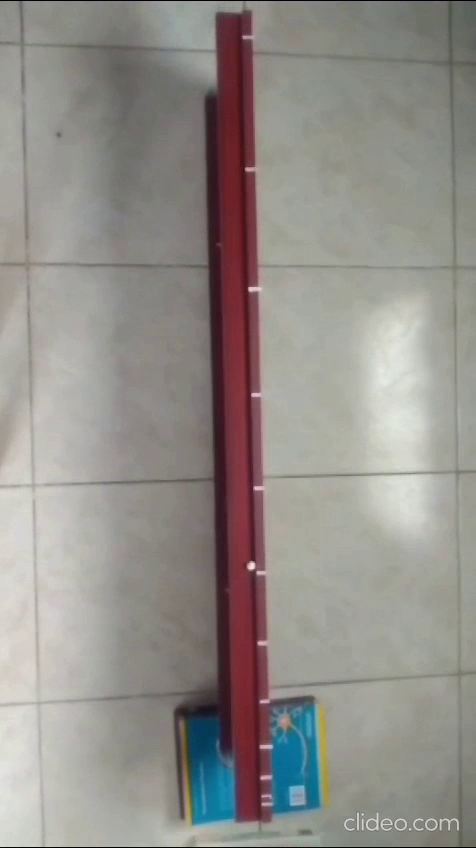

Fotograma número: 319


In [ ]:
fi, ff = 300, 320
frames = []

# Obtiene los fotogramas y los agrega a la lista
for i in range(fi, ff):
    frame = obtener_fotograma(video_path, i)
    frames.append((i, frame))  # Guarda el número de fotograma junto con el fotograma

# Muestra cada fotograma con un intervalo de 1 segundo, borrando el anterior
for frame_number, frame in frames:
    display.clear_output(wait=True)  # Borra el fotograma anterior
    cv2_imshow(frame)  # Muestra el fotograma actual
    print(f"Fotograma número: {frame_number}")  # Imprime el número de fotograma
    time.sleep(1)  # Espera 1 segundo antes de mostrar el siguiente


# Obteniendo fotogramas del vídeo a la vez

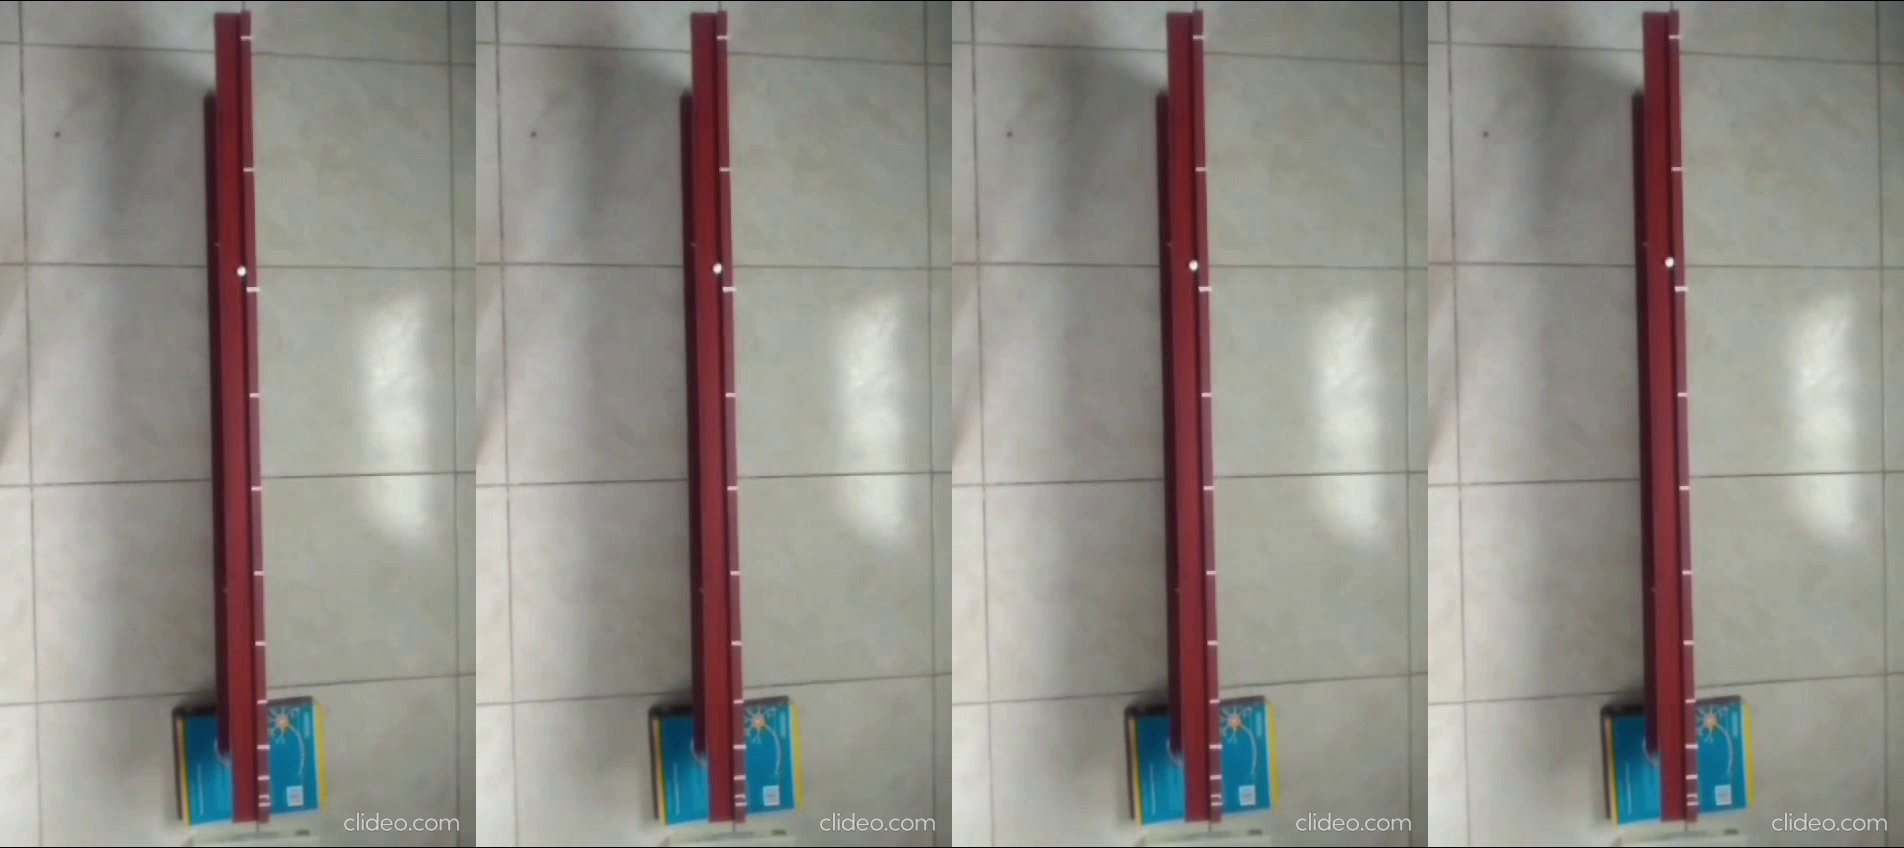

In [ ]:
fi, ff = 450,454
frames = []

# Obtiene los fotogramas y los agrega a la lista
for i in range(fi, ff):
    frame = obtener_fotograma(video_path, i)
    frames.append(frame)

# Concatenar todos los fotogramas en una imagen horizontal
horizontal_frames = cv2.hconcat(frames)

# Muestra la imagen con los fotogramas concatenados
cv2_imshow(horizontal_frames)


# Datos físicos extraidos del video
Actualice los datos de acuerdo con las características del vídeo.

In [ ]:
fps=30 # Fotogramas por segundo
T=1/fps # Tiempo entre cada fotograma
Distancias=[1,3,5,7,9,11,13,15,17,19,21] # distancia en cm por intervalo
Nf=[35,44,43,42,39,45,41,43,40,39,46]   # Número de fotogramas por intervalo


In [ ]:
#Generar lista de tiempos por intervalo
tint=[]
for k in range(len(Nf)):
  tint.append(Nf[k]*T)
#--
tint_red = [round(num, 3) for num in tint]
print("Tiempos ",tint_red)

Tiempos  [1.167, 1.467, 1.433, 1.4, 1.3, 1.5, 1.367, 1.433, 1.333, 1.3, 1.533]


# Prueba de la hipótesis de Galileao
Media y desviación estandar

In [ ]:
# Cálculo de la media, desviación estándar y error porcentual
media = round(np.mean(tint), 2)
desviacion_estandar = round(np.std(tint), 2)
error_porcentual = round((desviacion_estandar / media) * 100, 2)

print("Media:", media)
print("Desviación estándar:", desviacion_estandar)
print("Error porcentual:", error_porcentual,"%")

Media: 1.38
Desviación estándar: 0.1
Error porcentual: 7.25 %


# Gráficas


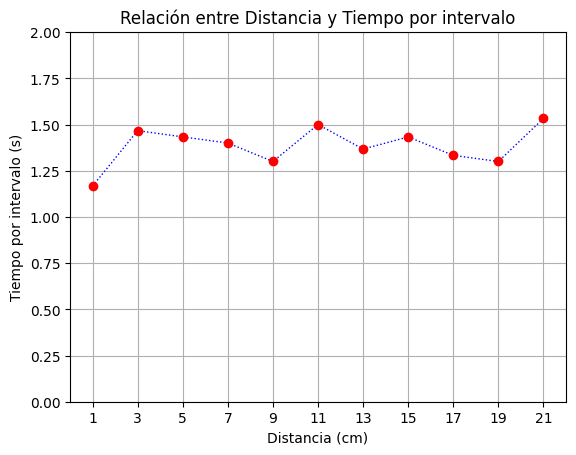

In [ ]:
# Gráfica
plt.plot(Distancias, tint_red, marker='o', linestyle=':', color='blue', linewidth=1,
         markerfacecolor='red', markeredgecolor='red', markersize=6)
plt.xlabel("Distancia (cm)")
plt.ylabel("Tiempo por intervalo (s)")
plt.title("Relación entre Distancia y Tiempo por intervalo")
plt.ylim(0, 2)  # Ajuste del eje vertical entre 0 y 2
plt.xticks([d for d in Distancias if d % 2 != 0])  # Marcar solo los números impares en el eje x
plt.grid(True)
plt.show()

# Gráfica de distacias y tiempos totales

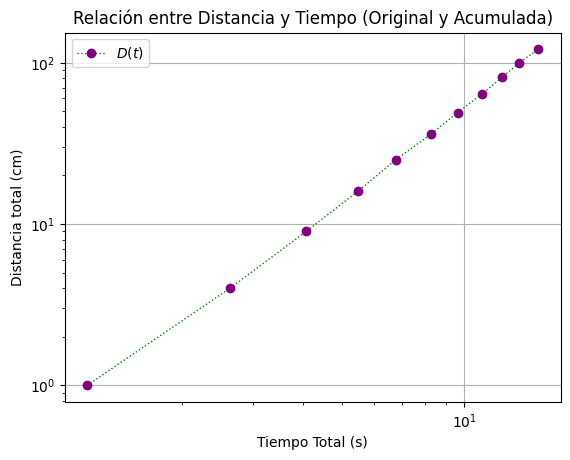

In [ ]:
# Generar listas de suma acumulada
Distancias_acumulada = [sum(Distancias[:i+1]) for i in range(len(Distancias))]
tint_red_acumulada = [sum(tint_red[:k+1]) for k in range(len(tint_red))]
#------
# Gráfica de Distancias vs tint_red Acumulada
plt.plot(tint_red_acumulada,Distancias_acumulada, marker='o', linestyle=':', color='green', linewidth=1,
         markerfacecolor='purple', markeredgecolor='purple', markersize=6, label="$D(t)$")
plt.ylabel("Distancia total (cm)")# Configuración de la gráfica
plt.xlabel("Tiempo Total (s)")
plt.title("Relación entre Distancia y Tiempo (Original y Acumulada)")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()
